[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ignaziogallo/data-mining/blob/aa20-21/tutorials/data/Handling_Outliers.ipynb)

* [source1](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)
* [source2](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

# Handling Outliers

* The best way to detect the outliers is to demonstrate the data `visually`. 
* All other methodologies are open to making mistakes, but they are fast. 
* Two different ways of handling outliers
  - standard deviation
  - percentiles.

* We will be using Boston House Pricing Dataset which is included in the sklearn dataset API. 
* We will load the dataset and separate out the features and targets.

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston,load_iris

In [3]:
#Load the data
boston = load_boston()

#Find features and target
x = boston.data
y = boston.target

#Find the dic keys
print(boston.keys())

dict_keys(['filename', 'target', 'DESCR', 'data', 'feature_names'])


In [4]:
#find features name
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
#Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
#Create dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df_o = boston_df
boston_df.shape

(506, 13)

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Discover outliers with visualization tools
###  Using Box plot ([Wikipedia Definition](https://en.wikipedia.org/wiki/Box_plot))

* From the Wikipedia Definition, in a box plot, *outliers* may be plotted as `individual points`.
* but other population will be grouped together and display as boxes. 

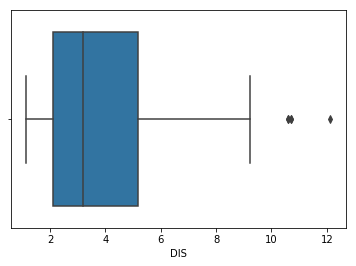

In [10]:
#Oulier detection - Univarite - Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=boston_df['DIS']) # DIS = weighted distances to five Boston employment centres

* Above plot shows three points between 10 to 12, these are `outliers` as there are not included in the box of other observation i.e no where near the quartiles.

### Using Scatter plot  ([Wikipedia Definition](https://en.wikipedia.org/wiki/Scatter_plot))

> A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically **two variables** for a set of data. <br>The data are displayed as a collection of points

* The scatter plot is the collection of points that shows values for two variables.
* We draw a scatter plot for two variables, to understand if there are **outliers**.


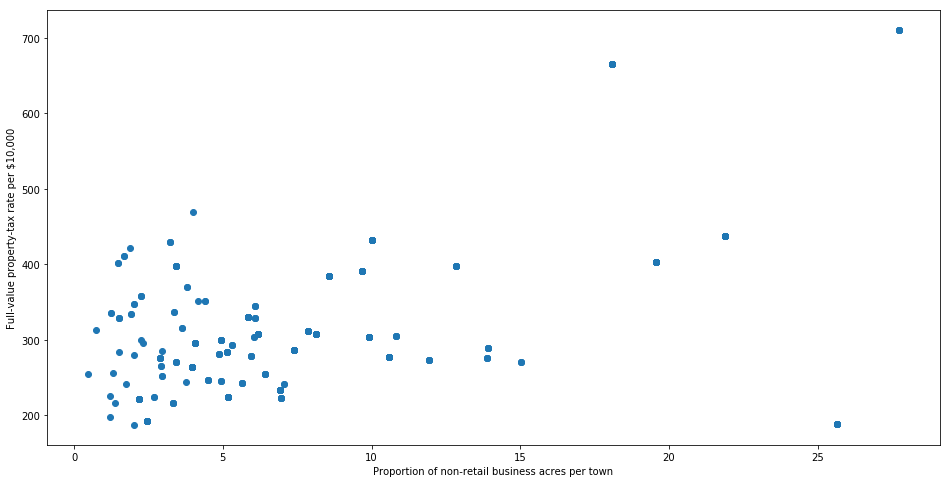

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

* Looking at the graph above, we know that **most of the data points** are in the lower left
* Some points (upper right corner) are far from the population. **They could be outliers**. 

## Outlier Detection with Standard Deviation

* If a value `v` has a distance from the mean $\mu$ greater than $\alpha * \sigma$, it can be assumed to be an outlier
$$\mu - \sigma * \alpha > v > \mu + \sigma * \alpha$$

* So what should $\alpha$ be?

* There is no trivial solution for $\alpha$ , but usually a value between 2 and 4 seems practical. 


In [12]:
factor = 3
upper_lim = boston_df['DIS'].mean () + boston_df['DIS'].std () * factor
lower_lim = boston_df['DIS'].mean () - boston_df['DIS'].std () * factor
print("upper_lim:", upper_lim)
print("lower_lim:", lower_lim)

upper_lim: 10.112173067629868
lower_lim: -2.5220876921357966


In [13]:
print("outliers:", boston_df[boston_df['DIS'] > upper_lim]['DIS'])

outliers: 351    10.7103
352    10.7103
353    12.1265
354    10.5857
355    10.5857
Name: DIS, dtype: float64


In [14]:
print("outliers:", boston_df[boston_df['DIS'] < lower_lim]['DIS'])

outliers: Series([], Name: DIS, dtype: float64)


* we can **drop the outlier rows** using standard deviation
* this will remove 5 rows from the dataset

In [15]:
boston_df_std = boston_df[(boston_df['DIS'] < upper_lim) & (boston_df['DIS'] > lower_lim)]
boston_df_std.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
print("original size:", boston_df.shape)
print("after drop:", boston_df_std.shape)

original size: (506, 13)
after drop: (501, 13)


## Outlier Detection with Percentiles

* Another mathematical method to detect outliers is to use [percentiles](https://en.wikipedia.org/wiki/Percentile). 
* You can assume a certain percent of the value from the top or the bottom as an outlier. 
* The key point is here to **set the percentage value** once again, and this depends on the distribution of your data

In [20]:
#Dropping the outlier rows with Percentiles
upper_lim = boston_df['DIS'].quantile(.999) # Return value at the given quantile
lower_lim = boston_df['DIS'].quantile(.001)

boston_df_qnt = boston_df[(boston_df['DIS'] < upper_lim) & (boston_df['DIS'] > lower_lim)]

print("upper_lim:", upper_lim)
print("lower_lim:", lower_lim)

print("original size:", boston_df.shape)
print("after drop:", boston_df_qnt.shape)

upper_lim: 11.411319000000088
lower_lim: 1.133337
original size: (506, 13)
after drop: (504, 13)


In [21]:
print("outliers:", boston_df[boston_df['DIS'] > upper_lim]['DIS'])

outliers: 353    12.1265
Name: DIS, dtype: float64
